<a href="https://colab.research.google.com/github/JaiderSantos/metodos1_JaiderSantos_NicolasGomez/blob/main/Tarea3/Tarea_3_puntos%203-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

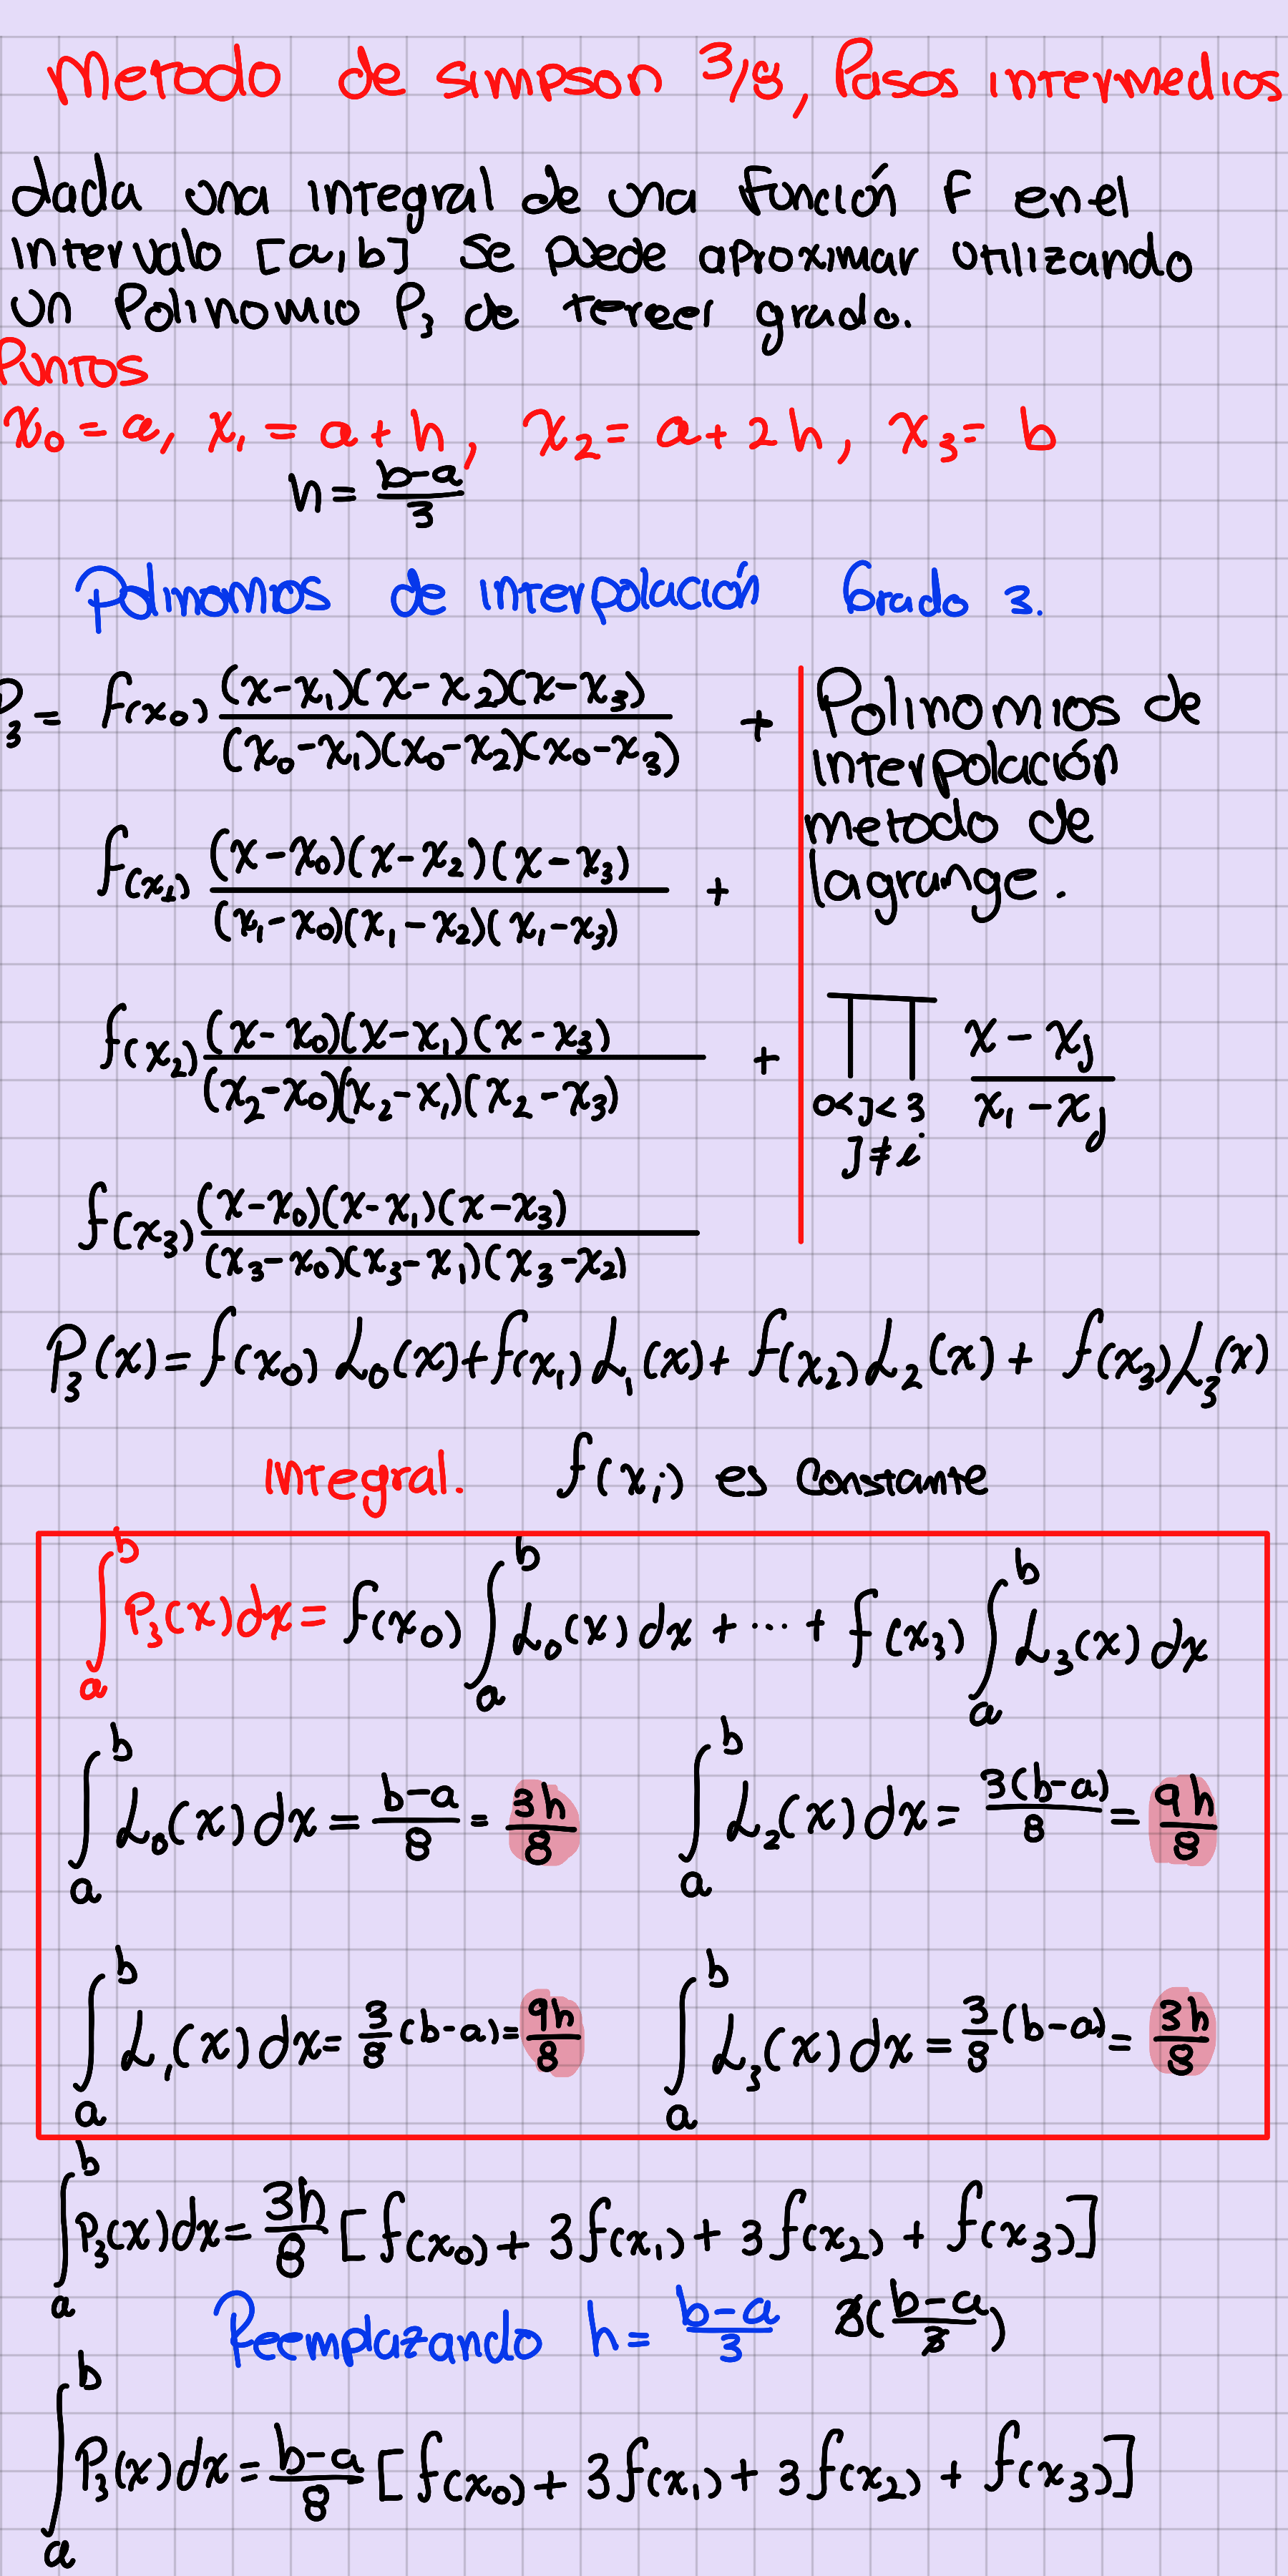

In [42]:
x = sp.Symbol('x')
x

x

In [43]:
#derivada
def dx(f,x):
  h = 1e-6
  return (f(x+h)-f(x-h))/(2*h)

In [44]:
#método de trapecio
def trapezoid(f,a,b,n):
  h= (b-a)/n
  integral = 0
  for i in range(1,n):
    integral += f(a+i*h)
  return h*(0.5*(f(a)+f(b))+integral)


In [45]:
#metodo de  simpson 1/3
def simpson13(f,a,b,n):
  h = (b-a)/n
  integral = 0
  for i in range(1,n):
    if i%2 == 0:
      integral += 2*f(a+i*h)
    else:
      integral += 4*f(a+i*h)
  return h/3*(f(a)+f(b)+integral)

# Problema 5

In [46]:
def f(x):
  return np.exp(-x**2)


In [47]:
Y_primitiva = trapezoid(f,0,1,100000)
print(Y_primitiva)

0.7468241328062873


# problema 6

In [48]:
def f(x):
  return (np.sqrt((0.01**2) - x**2))/(0.5+x)

In [49]:
integral_trap = trapezoid(f,-0.01,0.01,1000000)
integral_simp = simpson13(f,-0.01,0.01,100000)
error_estimado = np.abs((integral_simp-integral_trap)/integral_simp)*100
print(integral_trap,integral_simp,error_estimado)
#el error estimado de la integral de la función es 1.201993729240996e-06%

0.0003141906872375271 0.00031419068346097477 1.201993729240996e-06


# problema 7


In [50]:
#generar la grilla xy
X = np.linspace(-1,1,1001)
print(X)
Y = np.linspace(-1,1,1001)



[-1.    -0.998 -0.996 ...  0.996  0.998  1.   ]


In [51]:
#Funcion altura

def z(x,y,R):
  return np.sqrt(R**2-(x**2+y**2))

#Funcion altura promedio por cuadro de grilla

def altura_prom_z(x, y, R, n=1000):
    delta_vol = ((2*R)/n)**2  # Área de cada cuadrado pequeño
    volumen_total = 0


    for i in range(n):
        for j in range(n):
            # Calcular la altura en los 4 vértices del cuadrado pequeño
            if x[i]**2 + y[j]**2 <= R**2:
                f1 = z(x[i], y[j], R)
            else:
                f1 = 0

            if x[i+1]**2 + y[j]**2 <= R**2:
                f2 = z(x[i+1], y[j], R)
            else:
                f2 = 0

            if x[i]**2 + y[j+1]**2 <= R**2:
                f3 = z(x[i], y[j+1], R)
            else:
                f3 = 0

            if x[i+1]**2 + y[j+1]**2 <= R**2:
                f4 = z(x[i+1], y[j+1], R)
            else:
                f4 = 0

            # Promedio de los 4 vértices y añadir al volumen total
            promedio = (f1 + f2 + f3 + f4) / 4
            volumen_total += promedio * delta_vol

    return volumen_total


In [52]:
altura_funcion = altura_prom_z(X,Y,1)
altura_funcion

2.0943883788630453

# Problema 9

In [53]:
x = sp.Symbol('x')
h = sp.Symbol('h')

In [54]:
#discretización de 0 a 3*h
x0 = 0
x1 = h
x2 = 2 * h
x3 = 3 * h
# Definir las funciones f en esos puntos
f0 = sp.Function('f')(x0)
f1 = sp.Function('f')(x1)
f2 = sp.Function('f')(x2)
f3 = sp.Function('f')(x3)
#Lagrange manual
L0 = ((x - x1)*(x - x2)*(x - x3)) / ((x0 - x1)*(x0 - x2)*(x0 - x3))
L1 = ((x - x0)*(x - x2)*(x - x3)) / ((x1 - x0)*(x1 - x2)*(x1 - x3))
L2 = ((x - x0)*(x - x1)*(x - x3)) / ((x2 - x0)*(x2 - x1)*(x2 - x3))
L3 = ((x - x0)*(x - x1)*(x - x2)) / ((x3 - x0)*(x3 - x1)*(x3 - x2))
#Aproximar funcion p(X)=f0*L0 +...+ fn*Ln
p = f0*L0 + f1*L1 + f2*L2 + f3*L3
#integrar y simplificar
integral = sp.simplify(sp.integrate(p,(x,0,3*h)))
print(integral)

3*h*(f(0) + 3*f(h) + 3*f(2*h) + f(3*h))/8


#punto intermedio

In [55]:
a, b = sp.symbols('a b')
h = (b - a) / 3
x1 = a + h
x2 = a + 2 * h
a, b, h

(a, b, -a/3 + b/3)

x1 = a + h = (3*a/3)*((b-a)/3) = ( (2*a+b)/3)  
x2 = a + 2*h = (3*a/3) + ((2*b - 2*a)/3) = ((a + 2*b)/3)

In [56]:
x1

2*a/3 + b/3

In [57]:
x2

a/3 + 2*b/3

## Problema 10

In [58]:
x0 = 0
x1 = h
x2 = 2 * h
x3 = 3 * h

In [59]:
def error(x,x0,x1,x2,x3):
  return (x-x0)*(x-x1)*(x-x2)*(x-x3)

xi = sp.Symbol("xi")
f_4 = sp.Function("f^4")(xi)

In [60]:
poli_error = error(x,x0,x1,x2,x3)
integral_error = sp.simplify(sp.integrate(poli_error,(x,x0,x3)))
error_simp38= ((f_4)/(sp.factorial(4)))*integral_error
error_simp38

(a**5/270 - a**4*b/54 + a**3*b**2/27 - a**2*b**3/27 + a*b**4/54 - b**5/270)*f^4(xi)/24